<a href="https://colab.research.google.com/github/Tanjul5/World-Bank-Education-EDA-capston-1/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

 **First of all import all libraries**

In [219]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Let's Mount the Drive and analyse the data..

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
Hotel_book_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

some analysis on dataset

In [223]:
Hotel_book_df.describe

<bound method NDFrame.describe of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...    

In [224]:
#checking top 10 rows
Hotel_book_df.head

<bound method NDFrame.head of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [225]:
#checking last 10 rows 
Hotel_book_df.tail

<bound method NDFrame.tail of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [226]:
#check columns name
Hotel_book_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [227]:
Hotel_book_df.shape

(119390, 32)

In [228]:
#checking null values in ascending order
Hotel_book_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

childeren, Country, agent and company have a null values

In [229]:
Hotel_book_df.fillna(Hotel_book_df.mean())


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [230]:
#Replacing NUll value with zero for convinience

Hotel_book_df.fillna(0, inplace=True)

In [231]:
#again checking for null value
Hotel_book_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now we can see there is no null value in hotel Dataframe



In [232]:
#check duplicate rows
duplicate_rows_df = Hotel_book_df[Hotel_book_df.duplicated()].shape

print(f"the no. of duplicate rows :" , duplicate_rows_df)

the no. of duplicate rows : (31994, 32)


In [233]:
#drop duplicate values
df=Hotel_book_df.drop_duplicates()
df.shape

(87396, 32)

In [234]:
Hotel_book_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **some observations**

27.4 % of the people have cancelled their booking as per the dataset.

Avg. lead time is 80 days.

Only 4% of the guests are repeated.

Each booking has on an average 1.8 adults and 0.13 children.

STEP 2 : Data Analysis

what is the count of each type of Hotels ?

In [235]:
hotel_list = Hotel_book_df['hotel'].value_counts()
hotel_list
hotel_count = Hotel_book_df['hotel'].value_counts().index
hotel_count

Index(['City Hotel', 'Resort Hotel'], dtype='object')

The dataset describes two types of hotels, City and Resort hotel

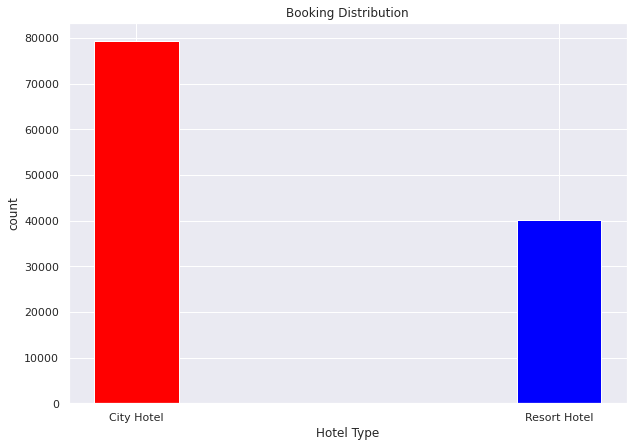

In [236]:
# creating the bar graph
plt.figure(figsize = (10,7))
plt.bar(hotel_count, hotel_list, color =['red','blue'], width = 0.2)
plt.xlabel("Hotel Type")
plt.ylabel("count")
plt.title('Booking Distribution')
plt.show()

the maximum number of customers prefer to book city hotel than the resort hotel.

In [237]:
top_10_countries = Hotel_book_df[Hotel_book_df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

Text(0, 0.5, 'No of Bookings')

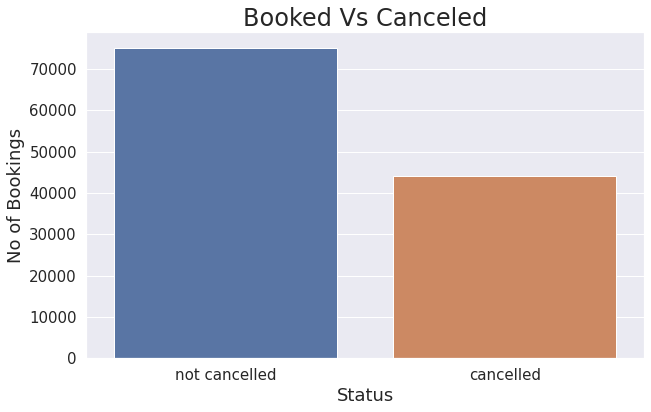

In [238]:
cancelled_df = Hotel_book_df['is_canceled'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=['not cancelled', 'cancelled'], y=cancelled_df['is_canceled']).set_title('Booked Vs Canceled', fontsize= '24')
sns.set_theme(style="darkgrid",font='sans-serif')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Status', fontsize='18')
plt.ylabel('No of Bookings', fontsize='18')

Text(0, 0.5, 'cancellation percentage')

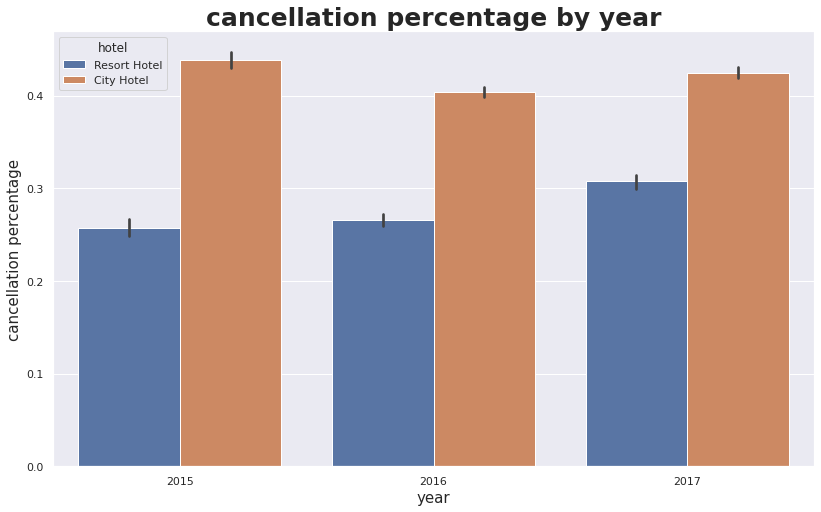

In [239]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.barplot(data = Hotel_book_df, x= 'arrival_date_year', y = 'is_canceled',hue = 'hotel')
plt.title('cancellation percentage by year',fontweight="bold", size=25)
plt.xlabel('year',size=15)
plt.ylabel('cancellation percentage',size=15)

Text(0, 0.5, 'Reservation Count')

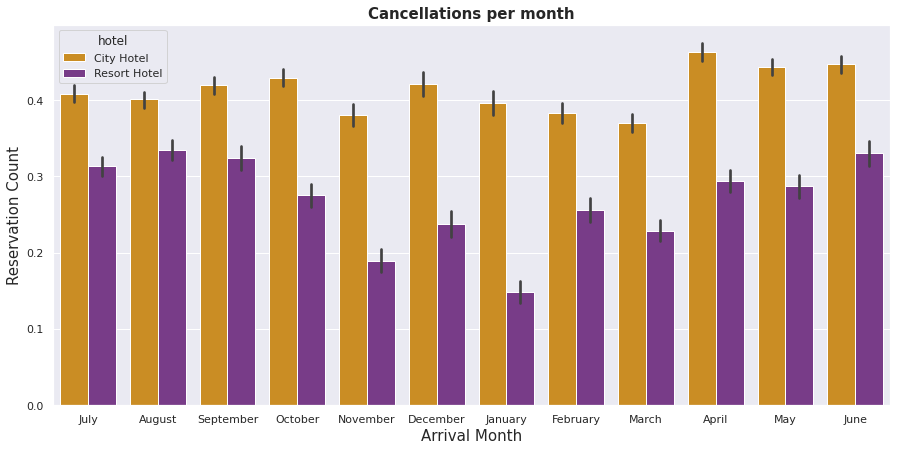

In [240]:
fig, ax = plt.subplots(figsize = (15,7))
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=Hotel_book_df,palette= 'CMRmap_r')
plt.title('Cancellations per month', weight='bold',size = 15)
plt.xlabel('Arrival Month', size = 15)
plt.ylabel('Reservation Count', size = 15)

Text(0, 0.5, 'Count')

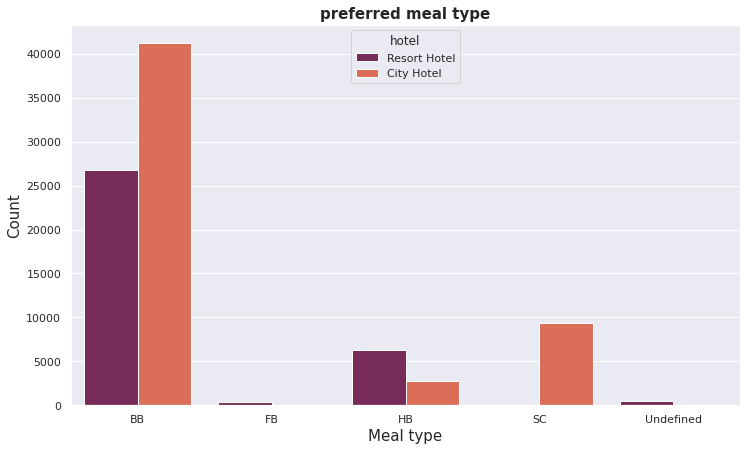

In [241]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'meal',hue = 'hotel',data = df,palette= 'rocket')
plt.title ('preferred meal type',weight = 'bold', size = 15)
plt.xlabel("Meal type",size = 15)
plt.ylabel('Count',size = 15)

Text(0.5, 1.0, 'Booking per year')

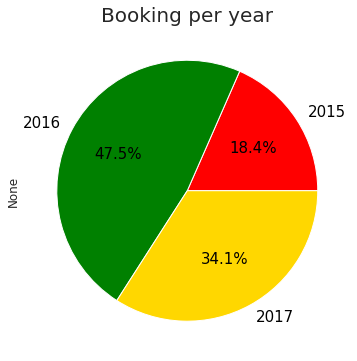

In [242]:
bookper_year=Hotel_book_df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.1f%%',  figsize=(6, 6), colors = [ 'red', 'green', 'gold'],textprops={'color':"black"}) 
plt.title('Booking per year',fontsize=20)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Reservation Count')

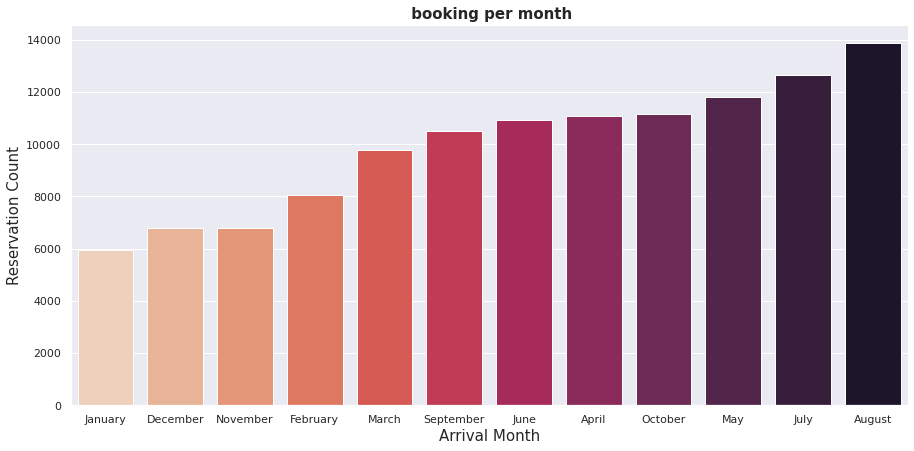

In [243]:
fig, ax = plt.subplots(figsize = (15,7))

x = Hotel_book_df.groupby('arrival_date_month')['arrival_date_month'].count().sort_values()
y = x.index.get_level_values(0)
sns.barplot(y, x, palette="rocket_r")
plt.title(' booking per month', weight='bold',size = 15)
plt.xlabel('Arrival Month', size = 15)
plt.ylabel('Reservation Count', size = 15)

Text(0, 0.5, 'No. of Bookings')

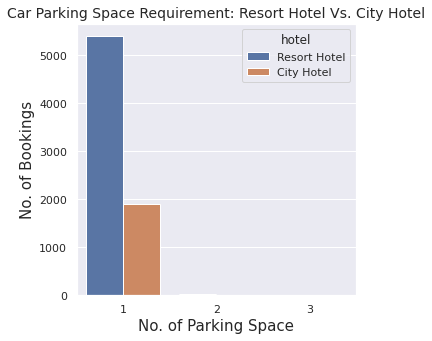

In [244]:
# Day wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'required_car_parking_spaces', hue = 'hotel', order=[1,2,3])
plt.title('Car Parking Space Requirement: Resort Hotel Vs. City Hotel',fontsize=14)
plt.xlabel('No. of Parking Space', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

Text(0, 0.5, 'No. of Bookings')

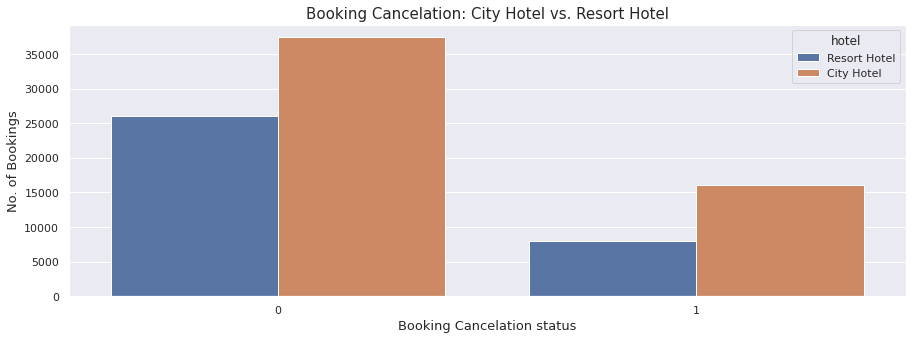

In [245]:
plt.rcParams['figure.figsize']= (15,5)
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Booking Cancelation: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Booking Cancelation status', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

Text(0, 0.5, 'Booking Count')

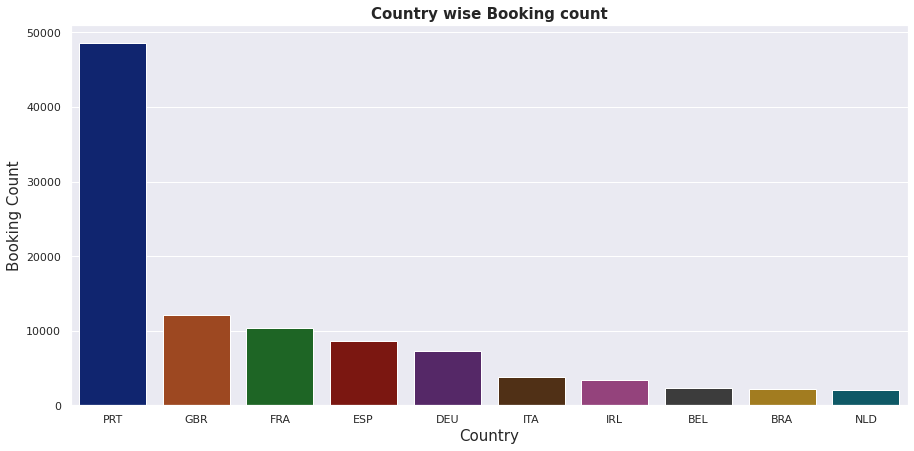

In [246]:
fig, ax = plt.subplots(figsize = (15,7))
x = Hotel_book_df.groupby('country')['country'].count().sort_values(ascending=False)[0:10]
y = x.index.get_level_values(0)
sns.barplot(x = y, y=x, palette = 'dark')
plt.title('Country wise Booking count', weight='bold',size = 15)
plt.xlabel('Country',size = 15)
plt.ylabel('Booking Count',size = 15)

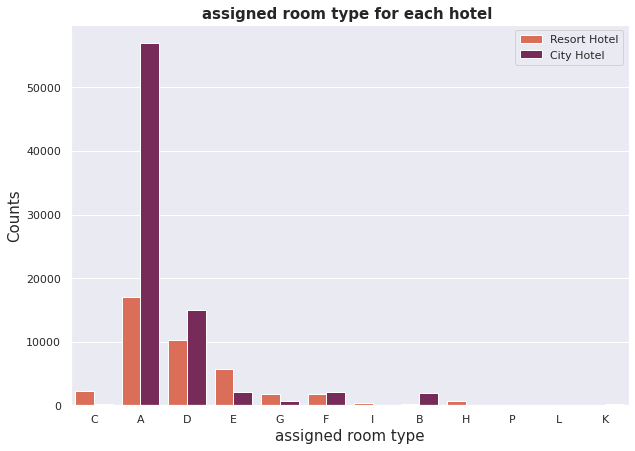

In [247]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='assigned_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('assigned room type for each hotel ', weight='bold',size = 15)
plt.xlabel('assigned room type',size = 15)
plt.ylabel('Counts',size = 15)
plt.legend(loc='upper right')

Text(0, 0.5, 'Counts')

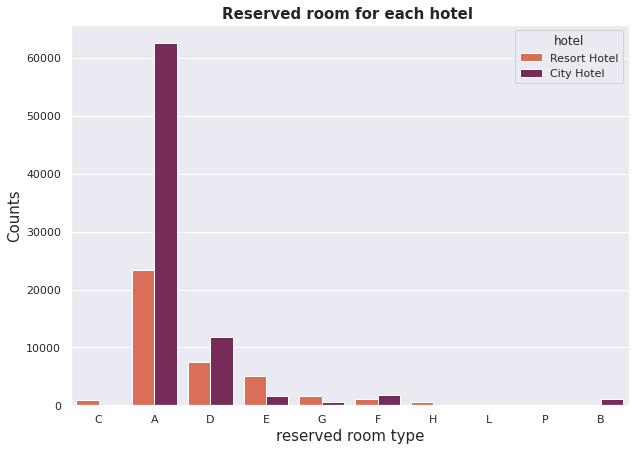

In [248]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='reserved_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Reserved room for each hotel ', weight='bold',size = 15)
plt.xlabel('reserved room type',size = 15)
plt.ylabel('Counts',size = 15)

Text(0, 0.5, 'Counts')

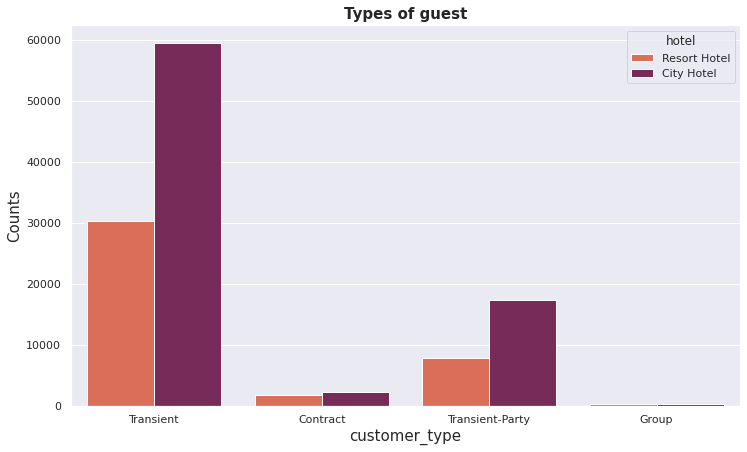

In [249]:
fig, ax = plt.subplots(figsize = (12,7))    
sns.countplot(x ='customer_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Types of guest', weight='bold',size = 15)
plt.xlabel('customer_type',size = 15)
plt.ylabel('Counts',size = 15)

Text(0, 0.5, 'No. of Bookings')

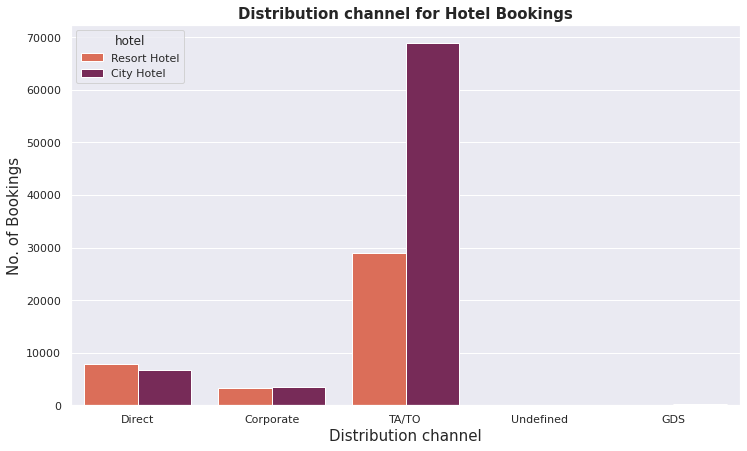

In [250]:
fig, ax = plt.subplots(figsize = (12,7))    
sns.countplot(x ='distribution_channel', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Distribution channel for Hotel Bookings', weight='bold',size = 15)
plt.xlabel('Distribution channel',size = 15)
plt.ylabel('No. of Bookings',size = 15)

Text(0, 0.5, 'No. of Bookings')

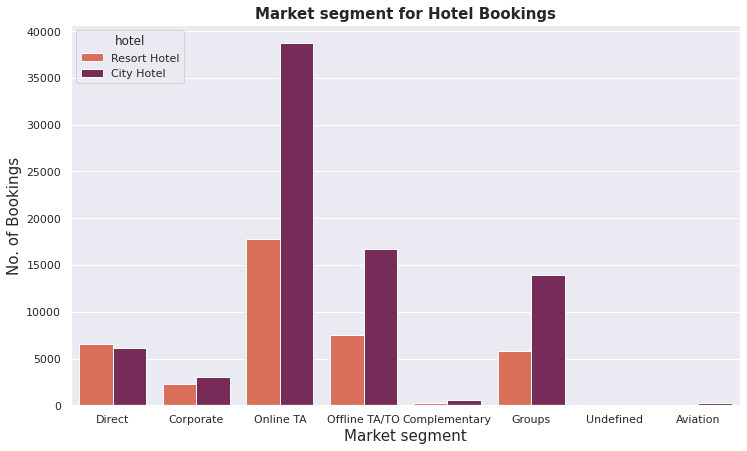

In [251]:
fig, ax = plt.subplots(figsize = (12,7))    
sns.countplot(x ='market_segment', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Market segment for Hotel Bookings', weight='bold',size = 15)
plt.xlabel('Market segment',size = 15)
plt.ylabel('No. of Bookings',size = 15)

Text(34.51712407826379, 0.5, 'Price')

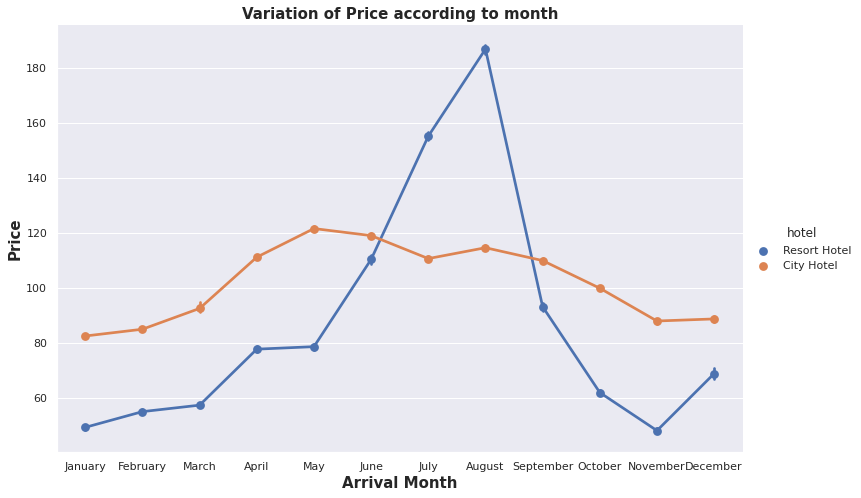

In [252]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.catplot(x = "arrival_date_month", y = "adr", data=Hotel_book_df, kind="point", order = months,hue = 'hotel',height=6.8, aspect=11.7/7.5, weight='bold')
plt.title("Variation of Price according to month", weight = 'bold', size = 15)
plt.xlabel("Arrival Month", size = 15, weight='bold', )
plt.ylabel("Price",size = 15, weight='bold')

Text(34.51712407826379, 0.5, 'Average Daily Rate')

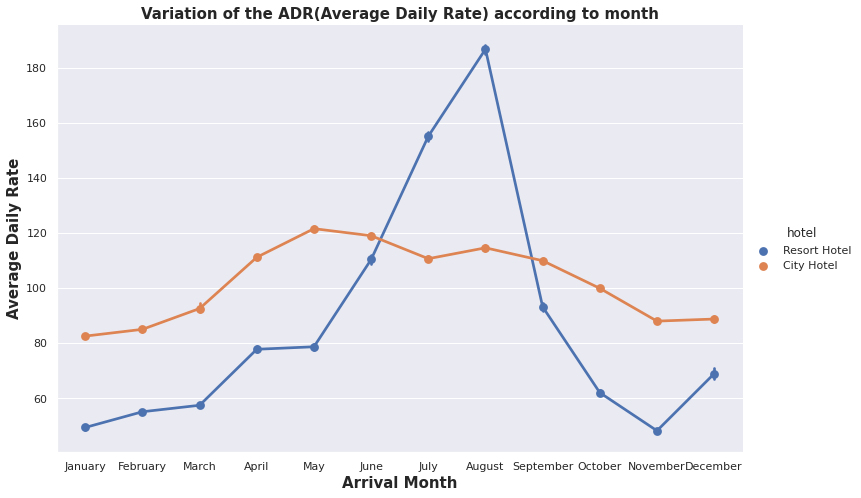

In [253]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.catplot(x = "arrival_date_month", y = "adr", data=Hotel_book_df, kind="point", order = months,hue = 'hotel',height=6.8, aspect=11.7/7.5, weight='bold')
plt.title("Variation of the ADR(Average Daily Rate) according to month", weight = 'bold', size = 15)
plt.xlabel("Arrival Month", size = 15, weight='bold', )
plt.ylabel("Average Daily Rate",size = 15, weight='bold')

Text(0.5, 1.0, 'Stays in weekend nights Vs. Bookings')

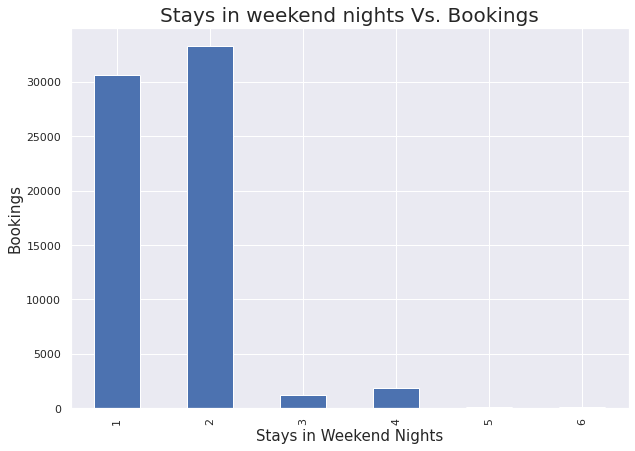

In [254]:
Hotel_book_df['stays_in_weekend_nights'].value_counts().sort_index()[1:7].plot(kind='bar', figsize=(10,7))
plt.xlabel('Stays in Weekend Nights' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('Stays in weekend nights Vs. Bookings', fontsize=20)


Text(0.5, 1.0, 'No. of Adults Vs. Bookings')

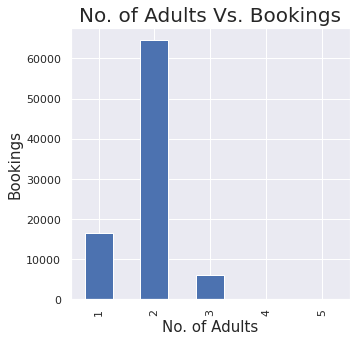

In [256]:
df['adults'].value_counts().sort_index()[1:6].plot(kind='bar', figsize=(5,5))
plt.xlabel('No. of Adults' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('No. of Adults Vs. Bookings', fontsize=20)

Text(0.5, 1.0, 'Guest Repeated Or Not')

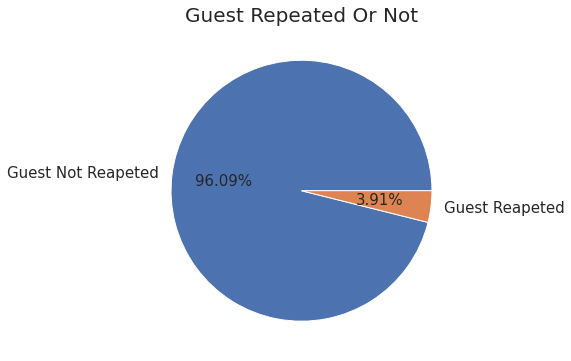

In [258]:
df.groupby('is_repeated_guest').size().plot(kind='pie', labels=['Guest Not Reapeted', 'Guest Reapeted'], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=15)
plt.title('Guest Repeated Or Not', fontsize=20)

Text(0.5, 0, 'No. of Changes Made')

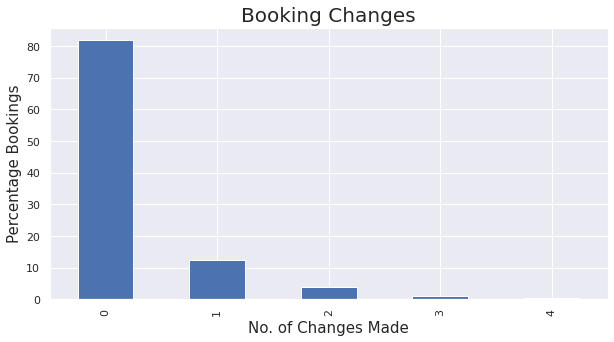

In [259]:
round(df['booking_changes'].value_counts(normalize=True) * 100, 2)[0:5].plot(kind='bar', figsize=(10,5))
plt.title('Booking Changes', fontsize=20)
plt.ylabel('Percentage Bookings', fontsize=15)
plt.xlabel('No. of Changes Made', fontsize=15)

Text(0.5, 1.0, 'Types of Deposit')

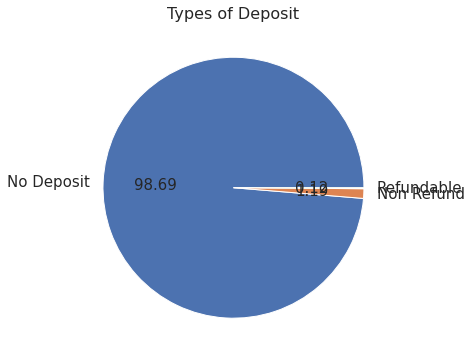

In [260]:
round(df['deposit_type'].value_counts(normalize=True) * 100, 2)
df.groupby('deposit_type').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Types of Deposit', fontsize=16)

Text(0, 0.5, 'No. of cancelaion')

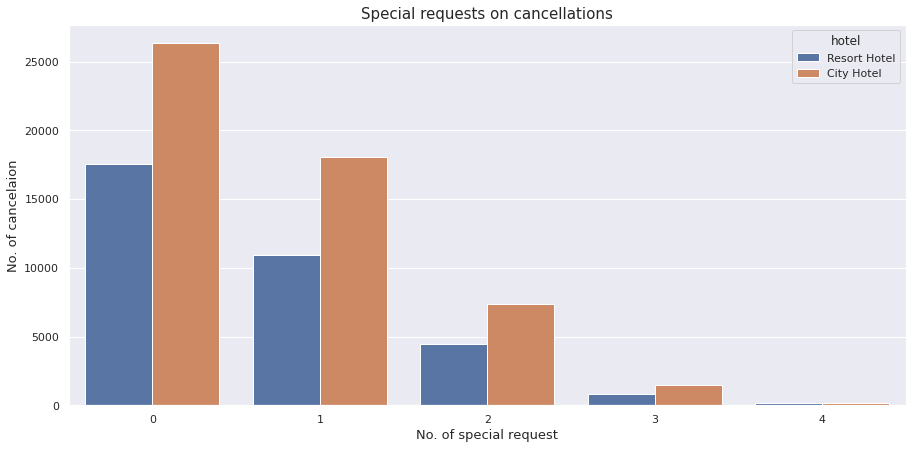

In [263]:
plt.rcParams['figure.figsize']= (15,7)
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel', order=[0,1,2,3,4])
plt.title('Special requests on cancellations',fontsize=15)
plt.xlabel('No. of special request', fontsize=13)
plt.ylabel('No. of cancelaion', fontsize=13)

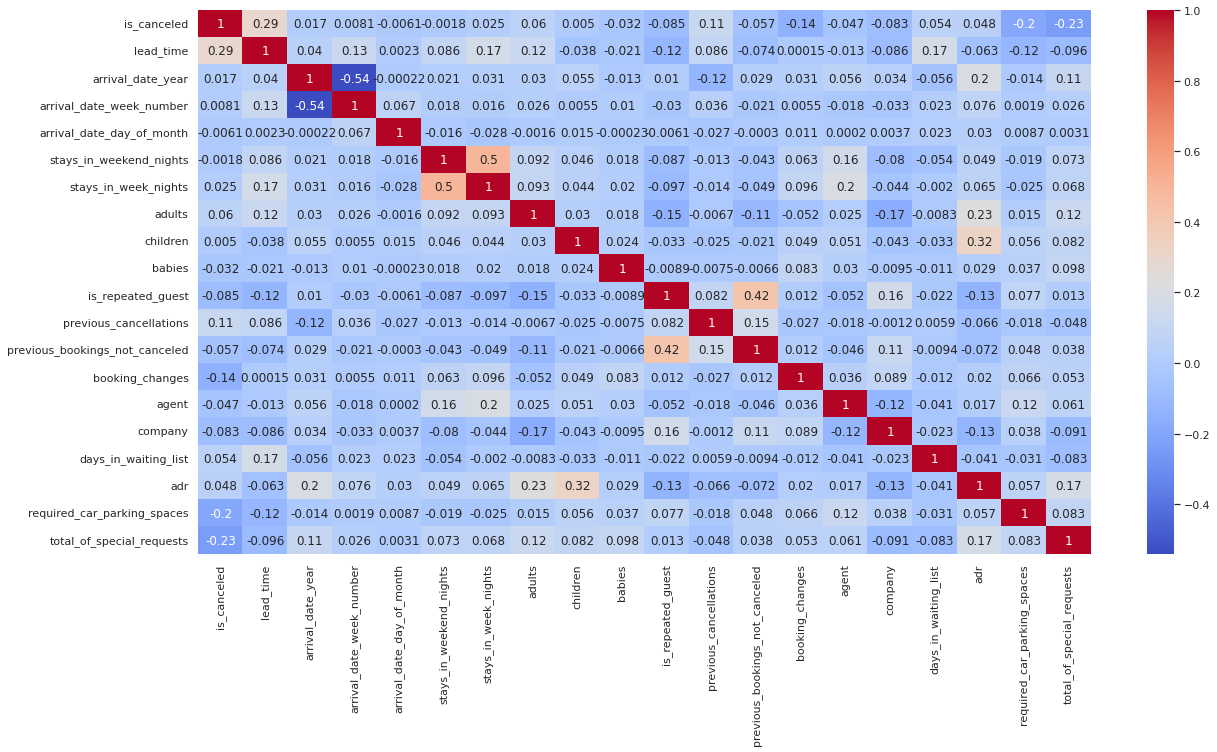

In [269]:
plt.figure(figsize=(20,10))
c=Hotel_book_df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

Conclusion:

From heatmap, positive correlation of total number of special requests with adr is highest(0.22), then with adults(0.2) & then with arrival year(0.11).

So hotel may recieve high number of special request with high adr, adults and arrival year.